# Basic Linux Command

If you haven't already, first install [Visual Studio Code](https://code.visualstudio.com)

For Windows users only, also install [WSL](https://ubuntu.com/desktop/wsl)

Then, open Visual Studio Code and open a new 'terminal' window.

1. Print working directory

    `pwd`


2. Change directory

    `cd <directory>` Chage to the directory specified

    `cd ..` Change to the parent directory of the current directory (go out one step)

    `cd ../..` Chage to the grand parent directory of the current directory (go out two steps)

    `cd -` Chage to the previous directory you were in


3. List folder and files in the current directory

    `ls` List files and directories

    `ls -alh` list everything, including hidden files, with details


4. Remove files and directories

    `rm <file>` Remove a file

    `rm -d <directory>`, `rmdir` Remove an empty directory

    `rm -rf <directory>` Remove a directory whether it is empty or not


5. Create a new directory

    `mkdir <new directory name>`


6. Print text on screen

    `echo <message/variable>` Print a message or variable on screen

    `less <text file>` Read the first few lines of a text file on screen; type q to quit

    `cat <text file>` Read the whole text file on screen


7. Copy files and directories

    `cp <file> <destination directory>` copy a file to a directory

    `cp -r <directory> <distination directory>` copy a directory to another directory


8. Move and rename files and directories

    `mv <file/directory> <new file/new directory within the original directory>` Rename a file within the same directory

    `mv <file/directory> <destination directory>` Move a file or directory into a new directory

## Create a text file

Using a built-in text editor to create a text file where you can put some text inside.

For this class, we will use `nano` as the text editor (there are other options too, e.g., vim).

In [ ]:
nano new_text_file.txt

# Type something on your screen

# Use CTRL + K to remove the whole line

# Then, save and close the shell by pressing CTRL + X and then Y and press ENTER

## Create and organise a directory

In [ ]:
# Create a new directory first

mkdir new_directory

# Then, move the text file you just created into this folder

mv new_text_file.txt new_directory

# Go inside that directory

cd new_directory

# Print the text file you just created

cat new_text_file.txt

# KU Nontri AI

We will use the KU Nontri AI for our bioinformatics pipeline. In the example today, we will run quality check, trim adaptor and perform plastid genome assembly.

## Manual

https://wiki.nontriai.ku.ac.th

## Log in to KU Nontri AI

Simply type ssh followed by your username and host name in your terminal (the laptop must be connected to KU network, either directly or through VPN.)

In [ ]:
ssh YOUR_USERNAME@158.108.222.131

# Then, type in your password

## Check the node status

In [ ]:
# Check resources for each partition
scontrol show partitions

# Check resources for each node
scontrol show nodes

## Conda

### Activation

If you have not used CONDA on this username before, type this:

In [ ]:
source /data/programs/anaconda3/bin/activate
conda init --all

Then, log out and re-log in again. Then test whether CONDA actually works by typing:

In [ ]:
# Check existing installed packages
conda list

# Check existing environments
conda env list

### Create a virtual environment

Since different packages usually require different set of dependencies (e.g., python version), it is a good practice to install each packages in different virtual environments.

In [ ]:
conda create --name test_environment python=3.12

### Remove a virtual environment

In [ ]:
TO DO

## Submit a job

To submit a job, we need to do it through SLURM


### Using SLURM shell script

An example of SLURM headings and simple script is shown below

You can use `nano` to create this script

In [ ]:
# To create the script

nano my_slurm_script.sh

# Then, copy and paste the following script

In [ ]:
#!/bin/bash

#SBATCH --job-name=test
#SBATCH --cpus-per-task=1
#SBATCH --gres=gpu:1
#SBATCH --mem=1G
#SBATCH --time=0-00:10:00
#SBATCH -o stdout_test.log
#SBATCH -e stderr_test.log
#SBATCH --email

echo "Hello! This is my first time using an HPC. My username is $USER. I submiited my first ever job using SLURM inside $PWD and my task number is $SLURM_JOB_ID." > output_out.txt

In [ ]:
# Then, save and close the shell by pressing CTRL + X and then Y and press ENTER

You can set SLURM to email you when the job has finished/failed/error occured/rached the time limit by adding a few lines...

In [ ]:
#!/bin/bash

#SBATCH --job-name=test
#SBATCH --cpus-per-task=1
#SBATCH --mem=1G
#SBATCH --time=0-00:10:00
#SBATCH -o stdout_test_%j.log
#SBATCH -e stderr_test_%j.log
#SBATCH --mail-user=nattanon.meep@live.ku.th
#SBATCH --mail-type=END,FAIL,TIME_LIMIT

echo "Hello! This is my first time using an HPC. My username is $USER. I submiited my first ever job using SLURM inside $PWD and my task number is $SLURM_JOB_ID." > output_out.txt

In [ ]:
# Then, submit the script you just created using

sbatch my_slurm_script.sh

### Using SBATCH command line

For less complicated script or something you need to run quickly, you can simply use the command `sbatch` with `wrap` that contains the command you want to run and submit it through SLRUM without having to create a SLURM shell script.

In [ ]:
# For example, if I want to run FastQC on all the .fq.gz files in the current directory using 4 CPUs and 3Gb of RAM

YOUR_CMD="fastqc *.fq.gz"

sbatch --job-name fastqc --cpus-per-task 4 --mem 2G --wrap="$YOUR_CMD"

## Example Genome Assembly tasks

Here, each of you will have different input raw read files from Illumina sequencing. They come from different species of plants.

We will assembly only the plastid genome (plastome) from these raw reads using GetOrganelle (basically, we will throw away about 90% of raw reads unfortunately).

Then, we will check what species they belong to using BLAST.

Create the SLURM script below using nano:

`nano getorganelle.sh`

Then copy and paste the following script, and save it using CTRL + X > y > ENTER:

In [ ]:
#!/bin/bash

#SBATCH --job-name=GetOrganelle
#SBATCH --cpus-per-task=4
#SBATCH --mem=12G
#SBATCH --time=0-6:00:00
#SBATCH -o stdout_getorganelle.log
#SBATCH -e stderr_getorganelle.log
#SBATCH --mail-user=nattanon.meep@live.ku.th
#SBATCH --mail-type=END,FAIL,TIME_LIMIT

if [[ $# -eq 0 ]] ; then
    echo 'Error: Please provide a sample name as the first argument when running this script.'
    exit 0
fi

source activate /data/users/fscinnme/packages/miniforge3/envs/getorganelle

name=$1

echo $name

get_organelle_from_reads.py -1 /data/users/fscinnme/data/raw_reads/${name}/${name}*_1.fq.gz -2 /data/users/fscinnme/data/raw_reads/${name}/${name}*_2.fq.gz -o plastid_${name} --prefix ${name}_ -R 30 -k 35,85,127 -F embplant_pt

In [ ]:
# Specify your sample name, for example

sample=NM221

Submit the SLURM script using the sbatch command with the first argument being your sample name:

In [ ]:
sbatch getorganelle.sh $sample

# You can also directly type your sample name in like this:

sbatch getorganelle.sh NM221

# File Transfer

Since we run these jobs on the remote server, we need to be able to transfer the inputs onto the remote server and the outputs back to local machine.

This can be done in multiple ways:

(1) Using SCP/SFCP protocols, either using command lines or 3rd-party softwares (e.g., FileZilla, WinSCP).

(2) Using Rsync—a built-in command that can 'sync' files between remote and local machines.

## FileZilla

First, download [FileZilla](https://filezilla-project.org) and install the program.

Then, connect to the remote host following the steps below:

![FileZillaConnect](Images/01_filezilla_connect.png)

After the connection is successful, you will see the remote directory on the righthand side window and your local directory on the lefthand side window.

Simply drag files you want to transfer between the remote host (righthand side) and your local machine (lefthand side) and wait until the transfer is done.

![FileZillaConnect](Images/02_filezilla_transfer.png)

## Rsync

Rsync provides command lines that can be used to transfer and sync data between your local and remote machines.

It has the advantages over FileZilla that you can include an rsync command inside your command line or shell, for example, transfer the output once the script finished running.

The following commands show example usage of rsync. To make it simple, always run rsync from your local machine.

In [ ]:
# This example uses for downloading all .html files from a remote directory to the current local directory

rsync -azv YOUR_USERNAME@158.108.222.131:/path/to/remote/directory/*html /path/to/local/directory

# Plastid Genome Annotation

After you get circular plastomes from GetOrganelle, you will see that inside these fasta files, there is simply a long string of nucleotide sequences and are not very meaningful to human eyes.

Therefore, we need to locate where each genes are, the process is called 'Annotation', so these plastomes become usable for other applications, e.g., phylogenetics or DNA barcoding.

This can be done in several ways. Today we will use [GeSeq](https://chlorobox.mpimp-golm.mpg.de/geseq.html), a web-based plastform, to help annotate our plastomes.

1. Simply upload your plastome assemblies (fasta file) — make sure they are circular plastomes
2. Check 'Circular' and 'Plastid (land plants)' and other options can be left as default.
3. You can optionally use other 3rd-party plastome annotators to either annotate or support the GeSeq default annotators. I personally perfer 'Chloe' as a stand-alone annotator.
4. I also found that ARAGORN is a better tRNA annotator than BLAT search.
5. My default settings can be found in the attach image below.

![Geseq settings](images/03_Geseq.png)

6. After finishing, you can download your results and now you will see a GenBank file of your plastomes which tells you the location of each plastid gene.
7. You can visualise GenBank file in a software like [OpenVectorEditor](https://github.com/TeselaGen/tg-oss/tree/master/packages/ove) (free) or Geneious (Subscription).
8. Then, you can see the location of every gene on your plastome. You can extract these data for other analyses.

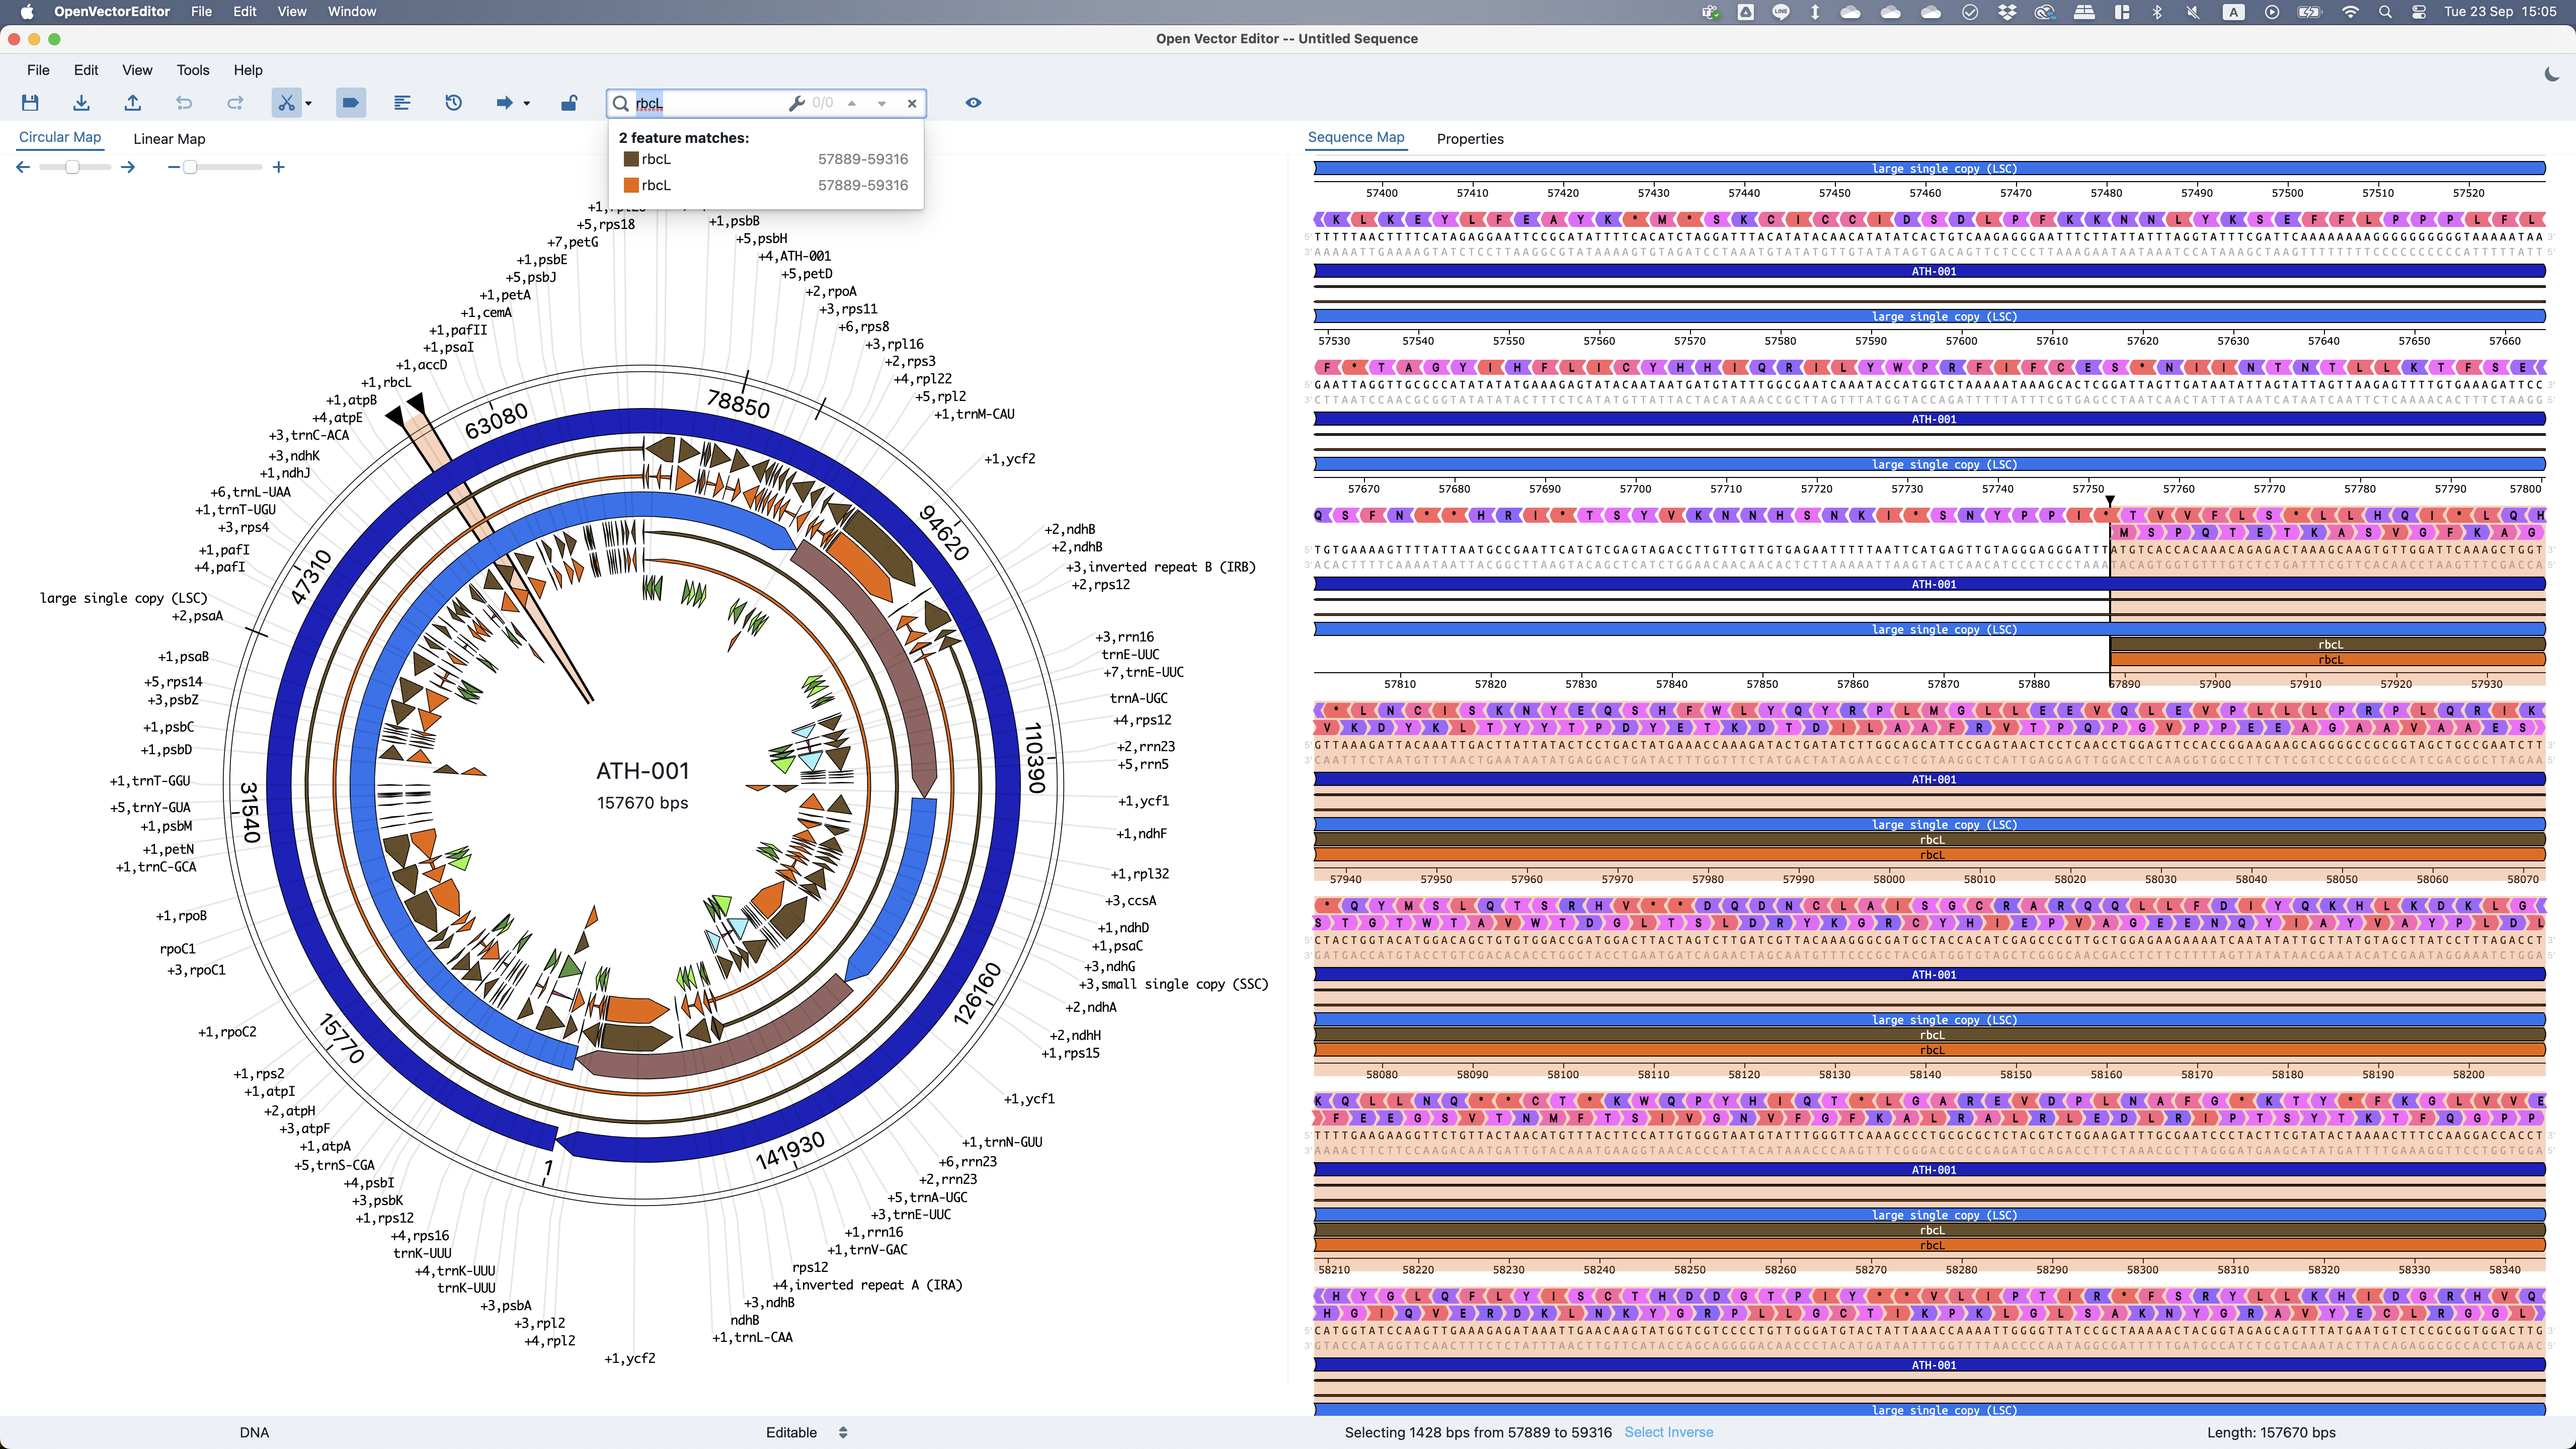